<h1>Comparing vocoid heatmaps for the same location but different speakers</h1>
I'd like to find out whether we can find similarities when different speakers from the same location tell different stories. Do speaker-specific differences overshadow the common properties of the "same" language? I'll be using two recorded stories from D02-ST01 (combined because of their shortness) and one from D02-ST03.

In [1]:
import pandas as pd
import numpy as np
import csv

# import matplotlib, start looking at data?
%matplotlib inline
import matplotlib.pyplot as plt

# INFO HERE: https://python-graph-gallery.com/85-density-plot-with-matplotlib/
from scipy.stats import kde

from scipy.spatial import ConvexHull

<h2> Getting the data</h2>
Read in the formant data from CSV files into two NumPy arrays.

In [2]:
D02ST01_formants = pd.read_csv("D02-ST01-RTTcand_Lifesaving_voiced.csv", sep='\t')
D02ST01_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
0,0.025156,5,343.736,1249.720,2340.047,3562.029,4248.459
1,0.030156,5,349.957,1204.063,2301.378,3577.344,4201.510
2,0.035156,5,349.301,1206.090,2271.156,3566.622,4146.382
3,0.040156,5,346.693,1256.296,2318.054,3555.222,4222.095
4,0.045156,5,346.829,1344.173,2375.875,3641.780,4369.439
...,...,...,...,...,...,...,...
22940,114.725156,5,556.543,1668.597,2646.953,3348.168,4911.816
22941,114.730156,5,544.687,1675.091,2582.998,3361.249,4827.058
22942,114.735156,4,541.863,1686.457,2580.035,3382.547,--undefined--
22943,114.740156,5,535.587,1710.586,2607.202,3308.989,4843.488


In [3]:
D02ST03_formants = pd.read_csv("D02-ST03-RTT02_Bitten_by_bee_voiced.csv", sep='\t')
D02ST03_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
0,0.026135,5,304.898,1942.002,2435.318,3340.011,4105.806
1,0.031135,5,317.926,1959.867,2389.442,3327.704,4071.340
2,0.036135,5,338.481,1957.056,2338.799,3315.797,4014.953
3,0.041135,5,349.555,1952.810,2367.024,3327.166,4110.534
4,0.046135,5,365.568,1920.732,2361.949,3293.121,4217.575
...,...,...,...,...,...,...,...
15215,76.101135,4,669.378,1356.863,2394.761,3386.981,--undefined--
15216,76.106135,4,680.411,1352.860,2391.532,3380.157,--undefined--
15217,76.111135,4,758.080,1380.658,2367.523,3357.163,--undefined--
15218,76.116135,4,743.245,1378.561,2383.960,3379.977,--undefined--


<h2>Normalizing the data</h2>
For comparison, we need to normalize data:

$$F_j^* (n) = \frac{F_j(n) - F_j^{median}}{F_j^{median}} \text{ ,  for  } j = \{1, 2\} \text{ , }n = \{1 ... N\}$$

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5724721/

In [4]:
D02ST01_formants["F1n"], D02ST01_formants["F2n"] = (D02ST01_formants["F1(Hz)"] - D02ST01_formants["F1(Hz)"].median()) / D02ST01_formants["F1(Hz)"].median(), (D02ST01_formants["F2(Hz)"] - D02ST01_formants["F2(Hz)"].median()) / D02ST01_formants["F2(Hz)"].median()
D02ST01_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz),F1n,F2n
0,0.025156,5,343.736,1249.720,2340.047,3562.029,4248.459,-0.123335,-0.152293
1,0.030156,5,349.957,1204.063,2301.378,3577.344,4201.510,-0.107469,-0.183263
2,0.035156,5,349.301,1206.090,2271.156,3566.622,4146.382,-0.109142,-0.181888
3,0.040156,5,346.693,1256.296,2318.054,3555.222,4222.095,-0.115793,-0.147832
4,0.045156,5,346.829,1344.173,2375.875,3641.780,4369.439,-0.115447,-0.088223
...,...,...,...,...,...,...,...,...,...
22940,114.725156,5,556.543,1668.597,2646.953,3348.168,4911.816,0.419409,0.131839
22941,114.730156,5,544.687,1675.091,2582.998,3361.249,4827.058,0.389171,0.136244
22942,114.735156,4,541.863,1686.457,2580.035,3382.547,--undefined--,0.381969,0.143954
22943,114.740156,5,535.587,1710.586,2607.202,3308.989,4843.488,0.365962,0.160321


In [8]:
D02ST03_formants["F1n"], D02ST03_formants["F2n"] = (D02ST03_formants["F1(Hz)"] - D02ST03_formants["F1(Hz)"].median()) / D02ST03_formants["F1(Hz)"].median(), (D02ST03_formants["F2(Hz)"] - D02ST03_formants["F2(Hz)"].median()) / D02ST03_formants["F2(Hz)"].median()
D02ST03_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz),F1n,F2n
0,0.026135,5,304.898,1942.002,2435.318,3340.011,4105.806,-0.132849,0.388571
1,0.031135,5,317.926,1959.867,2389.442,3327.704,4071.340,-0.095797,0.401344
2,0.036135,5,338.481,1957.056,2338.799,3315.797,4014.953,-0.037337,0.399334
3,0.041135,5,349.555,1952.810,2367.024,3327.166,4110.534,-0.005842,0.396298
4,0.046135,5,365.568,1920.732,2361.949,3293.121,4217.575,0.039700,0.373362
...,...,...,...,...,...,...,...,...,...
15215,76.101135,4,669.378,1356.863,2394.761,3386.981,--undefined--,0.903757,-0.029816
15216,76.106135,4,680.411,1352.860,2391.532,3380.157,--undefined--,0.935135,-0.032678
15217,76.111135,4,758.080,1380.658,2367.523,3357.163,--undefined--,1.156031,-0.012802
15218,76.116135,4,743.245,1378.561,2383.960,3379.977,--undefined--,1.113840,-0.014301


<h2>Displaying and comparing</h2>
Let's plot the vowel space density for both samples. Is there a difference that is visible on inspection? If inspection shows no difference, is there a better way to calculate how much difference there might be?

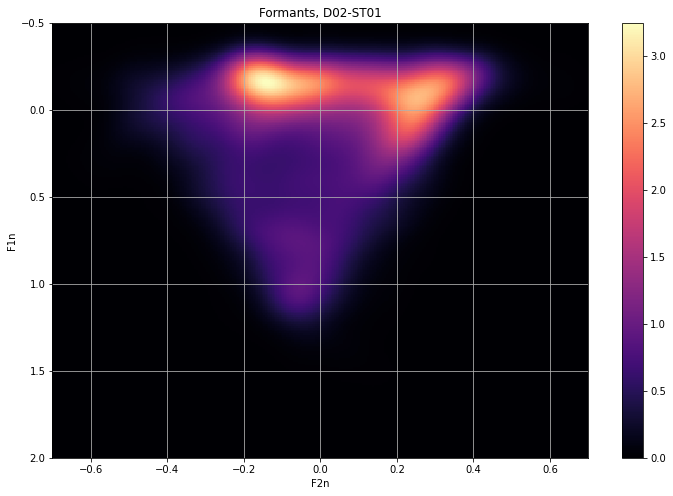

In [10]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=400
k = kde.gaussian_kde([D02ST01_formants["F2n"],D02ST01_formants["F1n"]])
xi, yi = np.mgrid[D02ST01_formants["F2n"].min():D02ST01_formants["F2n"].max():nbins*1j,
                  D02ST01_formants["F1n"].min():D02ST01_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.5)  # decreasing F1
ax.set_xlim(-0.7, 0.7)
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, D02-ST01')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("D02-ST01.png")
plt.show()

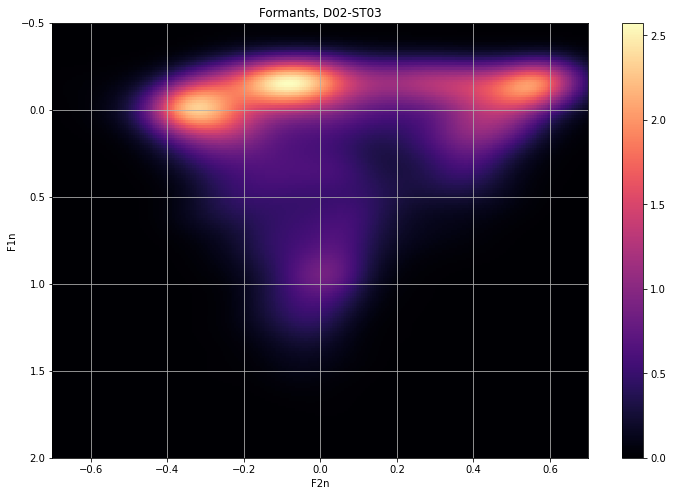

In [9]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=400
k = kde.gaussian_kde([D02ST03_formants["F2n"],D02ST03_formants["F1n"]])
xi, yi = np.mgrid[D02ST03_formants["F2n"].min():D02ST03_formants["F2n"].max():nbins*1j,
                  D02ST03_formants["F1n"].min():D02ST03_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.5)  # decreasing F1
ax.set_xlim(-0.7, 0.7)
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, D02-ST03')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("D02-ST03.png")
plt.show()